In [9]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Week 3 data.csv")

In [4]:
df

,Unnamed: 0,week_number,sales_depot_id,sales_channel_id,route_id,client_id,product_id,sales_unit_this_week,sales_this_week $,returns_unit_next_week,returns_next_week $,adjusted_demand,product_name,client_name,Town,state
0,0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3,Roles Canela 2p 120g BIM 1212,PUESTO DE PERIODICOS LAZARO,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,5,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4,Roles Glass 2p 135g BIM 1216,PUESTO DE PERIODICOS LAZARO,2008 AG. LAGO FILT,"MÉXICO, D.F."
2,11,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4,Panquecito Gota Choc 2p 140g BIM 1238,PUESTO DE PERIODICOS LAZARO,2008 AG. LAGO FILT,"MÉXICO, D.F."
3,18,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4,Mantecadas Vainilla 4p 125g BIM 1240,PUESTO DE PERIODICOS LAZARO,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,23,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3,Donitas Espolvoreadas 6p 105g BIM 1242,PUESTO DE PERIODICOS LAZARO,2008 AG. LAGO FILT,"MÉXICO, D.F."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210704,74180426,3,1993,2,1563,69906,48274,16,420.48,0,0.0,16,Totopo 1Kg MTB DH 48274,MZ PLAZA VALLE,2557 BW_GUASAVE,SINALOA
9210705,74180433,3,1160,8,3601,827594,1166,4608,303851.52,0,0.0,4608,Bollo Regular 2pq 30p McD BIM 1166,MC DONALDS ANTONIO CUAUTITLAN,2089 AG. AZCAPOTZALCO INSTITUCIONALES,"MÉXICO, D.F."
9210706,74180440,3,1160,8,3601,827594,1167,4608,382694.40,0,0.0,4608,Bollos Quarter Pounder McD 30p 1700g BIM 1167,MC DONALDS ANTONIO CUAUTITLAN,2089 AG. AZCAPOTZALCO INSTITUCIONALES,"MÉXICO, D.F."
9210707,74180446,3,1160,8,3601,827594,1168,3840,186816.00,0,0.0,3840,Bollo Big Mac 30p 1200g McD BIM 1168,MC DONALDS ANTONIO CUAUTITLAN,2089 AG. AZCAPOTZALCO INSTITUCIONALES,"MÉXICO, D.F."


In [14]:
df_hist = pd.DataFrame(df.groupby('client_id')['product_id'].nunique().sort_values(ascending=False))

In [15]:
df_hist

,product_id
client_id,
653378,190
2191379,161
956730,149
1483356,147
1327215,143
...,...
2472768,1
2472774,1
1379320,1


array([[<AxesSubplot:title={'center':'product_id'}>]], dtype=object)

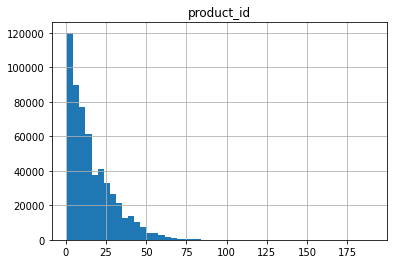

In [19]:
df_hist.hist(column='product_id', bins=50)

<AxesSubplot:xlabel='product_id', ylabel='Count'>

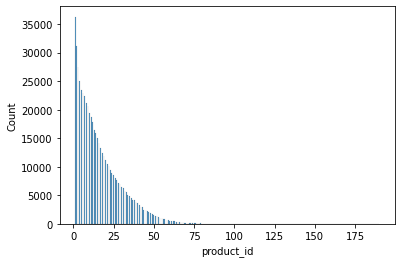

In [20]:
import seaborn as sns
sns.histplot(data=df_hist, x="product_id")

In [6]:
df_cleaned = df.drop((['Unnamed: 0', 'sales_depot_id', 'sales_channel_id', 'week_number', 'route_id', 'returns_unit_next_week', 'returns_next_week $', 'adjusted_demand', 'Town']), axis=1)

In [7]:
df_cleaned

,client_id,product_id,sales_unit_this_week,sales_this_week $,product_name,client_name,state
0,15766,1212,3,25.14,Roles Canela 2p 120g BIM 1212,PUESTO DE PERIODICOS LAZARO,"MÉXICO, D.F."
1,15766,1216,4,33.52,Roles Glass 2p 135g BIM 1216,PUESTO DE PERIODICOS LAZARO,"MÉXICO, D.F."
2,15766,1238,4,39.32,Panquecito Gota Choc 2p 140g BIM 1238,PUESTO DE PERIODICOS LAZARO,"MÉXICO, D.F."
3,15766,1240,4,33.52,Mantecadas Vainilla 4p 125g BIM 1240,PUESTO DE PERIODICOS LAZARO,"MÉXICO, D.F."
4,15766,1242,3,22.92,Donitas Espolvoreadas 6p 105g BIM 1242,PUESTO DE PERIODICOS LAZARO,"MÉXICO, D.F."
...,...,...,...,...,...,...,...
9210704,69906,48274,16,420.48,Totopo 1Kg MTB DH 48274,MZ PLAZA VALLE,SINALOA
9210705,827594,1166,4608,303851.52,Bollo Regular 2pq 30p McD BIM 1166,MC DONALDS ANTONIO CUAUTITLAN,"MÉXICO, D.F."
9210706,827594,1167,4608,382694.40,Bollos Quarter Pounder McD 30p 1700g BIM 1167,MC DONALDS ANTONIO CUAUTITLAN,"MÉXICO, D.F."
9210707,827594,1168,3840,186816.00,Bollo Big Mac 30p 1200g McD BIM 1168,MC DONALDS ANTONIO CUAUTITLAN,"MÉXICO, D.F."


In [7]:
df.groupby('product_name')['sales_unit_this_week'].sum().sort_values(ascending=False)

product_name
Nito 1p 62g Central BIM 2425                    2372795
Nito 1p 62g BIM 1278                            1997902
Gansito 1p 50g MTB MLA 43285                    1988269
Rebanada 2p 55g BIM 1284                        1850637
Barritas Fresa 67g Prom MTB MLA 30572           1786801
                                                 ...   
Galleta Almenuez Bajio 57g Tira MTB TR 36310          0
Galleta Arandaleta 57g SP Tira TR 37220               0
Max Two Pack Elote Mango 2p 25g VER 33845             0
Galleta Confeti 5p 65g Tira TR 35967                  0
Orejas 4p 51g Tira TR 36924                           0
Name: sales_unit_this_week, Length: 1550, dtype: int64

In [8]:
df_new = df_cleaned.drop((['sales_this_week $', 'client_name', 'state']), axis=1)

In [10]:
df_new

NameError: name 'df_new' is not defined

In [96]:
New_dataframe = df_new.drop((['client_id', 'sales_unit_this_week']), axis=1)

In [97]:
New_dataframe = New_dataframe.drop_duplicates(subset=['product_id'])

In [99]:
New_dataframe.to_csv('product names.csv')

In [10]:
pd.DataFrame(df_new.groupby("product_id")["sales_unit_this_week"].sum().sort_values(ascending=False))

,sales_unit_this_week
product_id,
2425,2372795
1278,1997902
43285,1988269
1284,1850637
30572,1786801
...,...
34486,0
37131,0
37133,0


In [11]:
df_product_sales = pd.DataFrame(df_new.groupby('product_id')['sales_unit_this_week'].sum().sort_values(ascending=False))

In [12]:
df_product_sales = df_product_sales.reset_index()

In [13]:
df_product_sales

,product_id,sales_unit_this_week
0,2425,2372795
1,1278,1997902
2,43285,1988269
3,1284,1850637
4,30572,1786801
...,...,...
1545,34486,0
1546,37131,0
1547,37133,0
1548,37185,0


In [14]:
import seaborn as sns
df_product_sales['product_id'] = df_product_sales['product_id'].astype(str)

In [15]:
df_new['product_id'].value_counts()

1240     264128
1242     249488
2233     233102
1250     225249
1232     199120
          ...  
31668         1
31667         1
4859          1
34548         1
33198         1
Name: product_id, Length: 1550, dtype: int64

In [16]:
df_grouped = df_new.groupby(['client_id', 'product_id'], as_index=False)['sales_unit_this_week'].sum()

In [17]:
df_grouped.head()

,client_id,product_id,sales_unit_this_week
0,26,1182,39
1,26,4767,84
2,26,31393,20
3,26,31690,42
4,26,32962,3


In [18]:
df_grouped.shape

(9187189, 3)

In [19]:
df_grouped['product_id'].nunique()

1550

In [20]:
df_grouped.loc[df_grouped["sales_unit_this_week"] == 0]

,client_id,product_id,sales_unit_this_week
235,107,43064,0
282,791,44859,0
1147,2119,1182,0
1873,2241,30946,0
2279,2315,1182,0
...,...,...,...
9185839,9817898,5350,0
9186180,9853756,43014,0
9186806,10142492,31466,0
9186807,10142492,31513,0


In [21]:
df_imp_products = df_grouped.loc[df_grouped["sales_unit_this_week"] > 100]

In [22]:
df_imp_products

,client_id,product_id,sales_unit_this_week
7,26,34206,120
34,60,32336,1728
35,60,32441,108
36,60,33260,135
38,60,33262,101
...,...,...,...
9186782,10033178,49028,198
9186817,10142588,36744,3120
9186991,10351796,43307,104
9187011,10351802,30572,125


In [23]:
df_imp_product_sales = pd.DataFrame(df_imp_products.groupby('product_id')['sales_unit_this_week'].sum().sort_values(ascending=False))

In [24]:
df_imp_product_sales

,sales_unit_this_week
product_id,
34786,345611
34206,301654
49028,292691
34865,271544
5200,219445
...,...
31596,102
43380,102
4259,102


In [25]:
df_imp_product_sales1 = (df_imp_product_sales.reset_index().head(20))

In [26]:
df_imp_product_sales1

,product_id,sales_unit_this_week
0,34786,345611
1,34206,301654
2,49028,292691
3,34865,271544
4,5200,219445
5,35145,191540
6,34211,189655
7,48996,184584
8,34210,184190
9,2233,155109


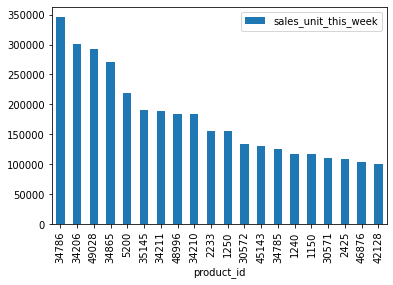

In [27]:
import matplotlib.pyplot as plt
ax = df_imp_product_sales1.plot.bar(x='product_id', y='sales_unit_this_week', rot=90)
plt.rcParams['figure.figsize'] = [15, 8]

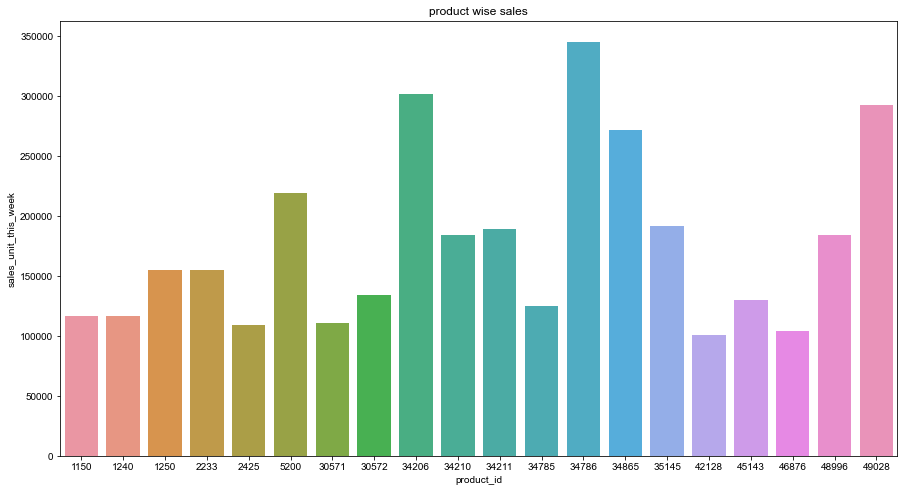

In [28]:
import seaborn as sns
sns.barplot(x="product_id", y="sales_unit_this_week", data=df_imp_product_sales1).set(title='product wise sales')
sns.set(rc = {'figure.figsize':(15,15)})

In [29]:
df_occurences = pd.DataFrame(df_imp_products['product_id'].value_counts().reset_index())

In [30]:
df_occurences = df_occurences.set_axis(['product_id', 'frequency'],axis=1, inplace=False)

In [31]:
df_occurences_top20 = df_occurences.head(20)

In [32]:
df_occurences_top20

,product_id,frequency
0,34786,1391
1,34865,1178
2,34206,1164
3,34211,914
4,49028,892
5,45143,849
6,34210,804
7,35145,781
8,2425,768
9,2233,755


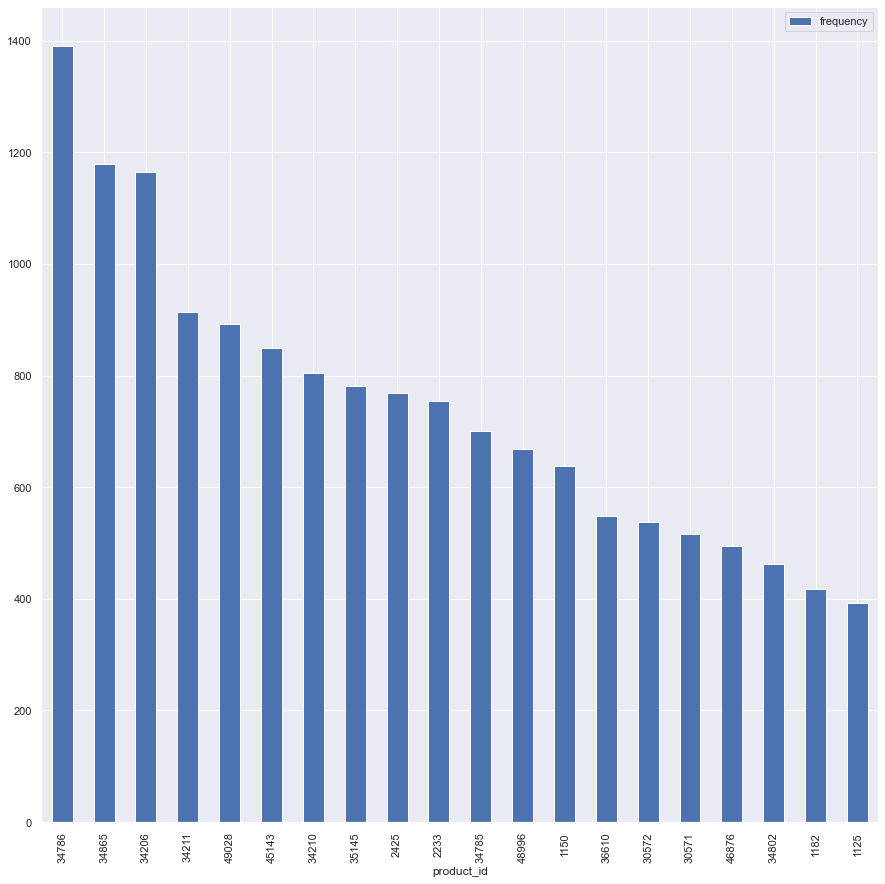

In [33]:
import matplotlib.pyplot as plt
ax = df_occurences_top20.plot.bar(x='product_id', y='frequency', rot=90)
plt.rcParams['figure.figsize'] = [15, 8]

In [34]:
df_imp_products.shape

(32638, 3)

In [35]:
df_imp_products['product_id'].nunique()

807

In [36]:
df_imp_products.to_csv('file_name.csv', index=False)

In [37]:
df_imp_products

,client_id,product_id,sales_unit_this_week
7,26,34206,120
34,60,32336,1728
35,60,32441,108
36,60,33260,135
38,60,33262,101
...,...,...,...
9186782,10033178,49028,198
9186817,10142588,36744,3120
9186991,10351796,43307,104
9187011,10351802,30572,125


In [38]:
df_imp_products['product_id'].nunique()

807

x= df_imp_products['product_name']

y = x.to_list()

import re
x =[]
for i in y:
    res = re.findall('([a-zA-Z ]*)\d*.*',i)
    for j in res:
        x.append(j)
x

y = []
for i in x:
    if i != '':
        y.append(i.strip())
y

df_new_product = pd.DataFrame(y)

df_new_product

df_imp_products['product name'] = y

df_imp_products

df.to_csv('file_name.csv', index=False)

In [39]:
df_imp_products.groupby('client_id')['product_id'].nunique().sort_values(ascending=False)

client_id
653378     168
653039      66
19260       59
23849       59
1200400     59
          ... 
705918       1
704467       1
701432       1
701096       1
1051627      1
Name: product_id, Length: 10205, dtype: int64

In [40]:
df_MBA = df_imp_products.drop(['sales_unit_this_week'], axis=1)

In [41]:
df_MBA

,client_id,product_id
7,26,34206
34,60,32336
35,60,32441
36,60,33260
38,60,33262
...,...,...
9186782,10033178,49028
9186817,10142588,36744
9186991,10351796,43307
9187011,10351802,30572


In [42]:
client_item_list = []
for num in list(set(df_MBA.client_id.tolist())):

    tmp_df = df_MBA.loc[df_MBA['client_id'] == num]

    tmp_items = tmp_df.product_id.tolist()

    client_item_list.append(tmp_items)

In [43]:
print(client_item_list[0:20])

[[44102], [32393], [30572], [30572, 30575], [1169], [202], [43285], [2425], [44102], [34206], [45143], [2028], [33260, 33261, 33262, 33265, 34258, 34787, 34793, 34851, 34867, 35244, 35247, 43192, 43348, 43349, 43364], [45143], [5000, 30571], [45143], [40447], [35144], [36610], [1284, 2425]]


In [44]:
import mlxtend.preprocessing
import mlxtend.frequent_patterns
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(client_item_list)


online_encoder_df = pd.DataFrame(online_encoder_array, columns=online_encoder.columns_)


online_encoder_df

,41,53,72,73,108,123,131,132,141,145,...,49737,49738,49739,49740,49765,49769,49782,49928,49988,49992
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Support = 0.01

In [45]:
apriori_model_colnames_sup = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True)

print(apriori_model_colnames_sup)

       support                                           itemsets
0     0.023518                                             (1120)
1     0.038413                                             (1125)
2     0.010681                                             (1129)
3     0.020186                                             (1145)
4     0.027634                                             (1146)
...        ...                                                ...
8114  0.010093  (34786, 34211, 48996, 46876, 49028, 35142, 351...
8115  0.011563  (34785, 34210, 34211, 48996, 49028, 35142, 347...
8116  0.011563  (34785, 34210, 34211, 48996, 49028, 34786, 351...
8117  0.010975  (34785, 34210, 34211, 48996, 49028, 35142, 347...
8118  0.010779  (34210, 34211, 48996, 49028, 35142, 34786, 351...

[8119 rows x 2 columns]


In [46]:
apriori_model_colnames_sup['length'] = (
    apriori_model_colnames_sup['itemsets'].apply(lambda x: len(x))
)

apriori_model_colnames_sup

,support,itemsets,length
0,0.023518,(1120),1
1,0.038413,(1125),1
2,0.010681,(1129),1
3,0.020186,(1145),1
4,0.027634,(1146),1
...,...,...,...
8114,0.010093,"(34786, 34211, 48996, 46876, 49028, 35142, 351...",10
8115,0.011563,"(34785, 34210, 34211, 48996, 49028, 35142, 347...",10
8116,0.011563,"(34785, 34210, 34211, 48996, 49028, 34786, 351...",10
8117,0.010975,"(34785, 34210, 34211, 48996, 49028, 35142, 347...",10


In [47]:
rules_support_01 = []
r = [0.5,0.6,0.7,0.8,0.9]
for i in r:
    rules_value = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames_sup, 
    metric="confidence",
    min_threshold=i, 
    support_only=False)
    rules_support_01.append(len(rules_value))
print(rules_support_01)

[316312, 237163, 161616, 94417, 42440]


In [76]:
rules_value = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames_sup, 
    metric="confidence",
    min_threshold=1, 
    support_only=False)
rules_value

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(34785, 1182)",(34786),0.018324,0.136306,0.018324,1.0,7.336449,0.015827,inf
1,"(34802, 1182)",(34786),0.016071,0.136306,0.016071,1.0,7.336449,0.013880,inf
2,"(46876, 1182)",(34786),0.016854,0.136306,0.016854,1.0,7.336449,0.014557,inf
3,"(34802, 4767)",(34786),0.010485,0.136306,0.010485,1.0,7.336449,0.009056,inf
4,"(30314, 34802)",(34786),0.011171,0.136306,0.011171,1.0,7.336449,0.009648,inf
...,...,...,...,...,...,...,...,...,...
3452,"(34785, 34210, 34211, 48996, 49028, 35145, 348...",(34786),0.011563,0.136306,0.011563,1.0,7.336449,0.009987,inf
3453,"(34785, 34210, 34211, 48996, 49028, 35142, 351...",(34786),0.010975,0.136306,0.010975,1.0,7.336449,0.009479,inf
3454,"(34210, 34211, 49028, 48996, 35142, 34786, 351...",(34865),0.010779,0.115434,0.010779,1.0,8.662988,0.009535,inf
3455,"(34210, 34211, 49028, 48996, 35142, 35145, 348...",(34786),0.010779,0.136306,0.010779,1.0,7.336449,0.009310,inf


In [75]:
rules_sup = rules_value.sort_values(by='lift', ascending=False)
rules_sup

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(34787),(34867),0.010779,0.012249,0.010289,0.954545,77.929091,0.010157,21.730524
27165,"(34210, 48996, 43246)","(34865, 34786, 49028, 34802)",0.010975,0.028123,0.010093,0.919643,32.700193,0.009784,12.094463
16280,"(34210, 48996, 43246)","(34865, 34802, 49028)",0.010975,0.028221,0.010093,0.919643,32.586651,0.009783,12.093244
27161,"(48996, 34210, 34786, 43246)","(34865, 34802, 49028)",0.010975,0.028221,0.010093,0.919643,32.586651,0.009783,12.093244
28336,"(35145, 34786, 48996, 43246)","(34802, 34211, 49028)",0.011171,0.030181,0.010093,0.903509,29.936062,0.009756,10.050849
...,...,...,...,...,...,...,...,...,...
8514,"(49028, 34914, 48996, 34865)",(34786),0.011661,0.136306,0.010583,0.907563,6.658289,0.008994,9.343602
1435,"(34914, 34211, 34206)",(34786),0.013621,0.136306,0.012347,0.906475,6.650306,0.010490,9.234885
503,"(48996, 49028)",(34786),0.062126,0.136306,0.056149,0.903785,6.630576,0.047681,8.976757
1554,"(34914, 49028, 34206)",(34786),0.013033,0.136306,0.011759,0.902256,6.619352,0.009982,8.836257


# Support = 0.03

In [49]:
apriori_model_new = mlxtend.frequent_patterns.apriori(online_encoder_df, min_support=0.03)
apriori_model_new

,support,itemsets
0,0.038413,(35)
1,0.062518,(43)
2,0.040960,(50)
3,0.030279,(62)
4,0.073983,(75)
...,...,...
311,0.031553,"(389, 359, 360, 788, 412, 381)"
312,0.034787,"(389, 359, 360, 786, 788, 381)"
313,0.030083,"(359, 360, 786, 788, 412, 381)"
314,0.030769,"(389, 360, 786, 788, 380, 381)"


In [50]:
apriori_model_colnames_new = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.03,
    use_colnames=True)

print(apriori_model_colnames_new)

      support                                    itemsets
0    0.038413                                      (1125)
1    0.062518                                      (1150)
2    0.040960                                      (1182)
3    0.030279                                      (1278)
4    0.073983                                      (2233)
..        ...                                         ...
311  0.031553  (34210, 34211, 49028, 34786, 35145, 34865)
312  0.034787  (34210, 34211, 48996, 49028, 34786, 34865)
313  0.030083  (34210, 34211, 49028, 48996, 34786, 35145)
314  0.030769  (34785, 34786, 34211, 48996, 49028, 34865)
315  0.031651  (34786, 34211, 48996, 49028, 35145, 34865)

[316 rows x 2 columns]


In [51]:
apriori_model_colnames_new['length'] = (
    apriori_model_colnames_new['itemsets'].apply(lambda x: len(x))
)

apriori_model_colnames_new

,support,itemsets,length
0,0.038413,(1125),1
1,0.062518,(1150),1
2,0.040960,(1182),1
3,0.030279,(1278),1
4,0.073983,(2233),1
...,...,...,...
311,0.031553,"(34210, 34211, 49028, 34786, 35145, 34865)",6
312,0.034787,"(34210, 34211, 48996, 49028, 34786, 34865)",6
313,0.030083,"(34210, 34211, 49028, 48996, 34786, 35145)",6
314,0.030769,"(34785, 34786, 34211, 48996, 49028, 34865)",6


In [52]:
rules_support_03 = []
r = [0.5,0.6,0.7,0.8,0.9]
for i in r:
    rules_value = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames_new, 
    metric="confidence",
    min_threshold=i, 
    support_only=False)
    rules_support_03.append(len(rules_value))
print(rules_support_03)

[2532, 1904, 1282, 773, 374]


# Support = 0.05

In [53]:
apriori_model = mlxtend.frequent_patterns.apriori(online_encoder_df, min_support=0.05)
apriori_model

,support,itemsets
0,0.062518,(43)
1,0.073983,(75)
2,0.075257,(78)
3,0.050563,(195)
4,0.052621,(196)
...,...,...
58,0.057129,"(788, 381, 389)"
59,0.056149,"(786, 788, 381)"
60,0.054679,"(360, 356, 381, 389)"
61,0.051151,"(360, 381, 389, 359)"


In [54]:
apriori_model_colnames = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.05,
    use_colnames=True)

print(apriori_model_colnames)

     support                      itemsets
0   0.062518                        (1150)
1   0.073983                        (2233)
2   0.075257                        (2425)
3   0.050563                       (30571)
4   0.052621                       (30572)
..       ...                           ...
58  0.057129         (34865, 34786, 49028)
59  0.056149         (49028, 34786, 48996)
60  0.054679  (34865, 34786, 34211, 34206)
61  0.051151  (34210, 34865, 34786, 34211)
62  0.054679  (34785, 34786, 34211, 34865)

[63 rows x 2 columns]


In [55]:
apriori_model_colnames['length'] = (
    apriori_model_colnames['itemsets'].apply(lambda x: len(x))
)

apriori_model_colnames

,support,itemsets,length
0,0.062518,(1150),1
1,0.073983,(2233),1
2,0.075257,(2425),1
3,0.050563,(30571),1
4,0.052621,(30572),1
...,...,...,...
58,0.057129,"(34865, 34786, 49028)",3
59,0.056149,"(49028, 34786, 48996)",3
60,0.054679,"(34865, 34786, 34211, 34206)",4
61,0.051151,"(34210, 34865, 34786, 34211)",4


In [56]:
rules_support_05 = []
r = [0.5,0.6,0.7,0.8,0.9]
for i in r:
    rules_value = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames, 
    metric="confidence",
    min_threshold=i, 
    support_only=False)
    rules_support_05.append(len(rules_value))
print(rules_support_05)

[171, 144, 96, 59, 30]


In [57]:
rules5 = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames, 
    metric="confidence",
    min_threshold=0.9, 
    support_only=False
)

rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(34210),(34786),0.078785,0.136306,0.071730,0.910448,6.679453,0.060991,9.644586
1,(34211),(34786),0.089564,0.136306,0.084174,0.939825,6.894977,0.071966,14.353028
2,(34785),(34786),0.068594,0.136306,0.066536,0.970000,7.116355,0.057186,28.789809
3,(34865),(34786),0.115434,0.136306,0.104067,0.901528,6.614014,0.088332,8.770964
4,(35145),(34786),0.076531,0.136306,0.072709,0.950064,6.970096,0.062278,17.296031
5,(48996),(49028),0.065458,0.087408,0.062126,0.949102,10.858278,0.056405,17.929746
6,"(34211, 34206)",(34786),0.065654,0.136306,0.061734,0.940299,6.898452,0.052785,14.466879
7,"(34865, 34206)",(34786),0.083293,0.136306,0.076433,0.917647,6.732270,0.065080,10.487716
8,"(34210, 34211)",(34786),0.060363,0.136306,0.058207,0.964286,7.074433,0.049979,24.183439
9,"(34865, 34210)",(34786),0.061440,0.136306,0.058207,0.947368,6.950320,0.049832,16.410191


In [59]:
rules6 = rules5.sort_values(by='lift', ascending=False)

In [60]:
rules6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23,"(34786, 48996)",(49028),0.058501,0.087408,0.056149,0.959799,10.980660,0.051036,22.700723
29,"(34785, 34865)","(34786, 34211)",0.059579,0.084174,0.054679,0.917763,10.903112,0.049664,11.136439
5,(48996),(49028),0.065458,0.087408,0.062126,0.949102,10.858278,0.056405,17.929746
27,"(34785, 34786, 34865)",(34211),0.058697,0.089564,0.054679,0.931553,10.400978,0.049422,13.301249
15,"(34785, 34865)",(34211),0.059579,0.089564,0.055071,0.924342,10.320472,0.049735,12.033590
12,"(34785, 34786)",(34211),0.066536,0.089564,0.059971,0.901325,10.063486,0.054011,9.226658
26,"(34785, 34786, 34211)",(34865),0.059971,0.115434,0.054679,0.911765,7.898607,0.047756,10.025086
14,"(34785, 34211)",(34865),0.061049,0.115434,0.055071,0.902087,7.814766,0.048024,9.034178
28,"(34785, 34211, 34865)",(34786),0.055071,0.136306,0.054679,0.992883,7.284232,0.047173,121.349045
19,"(34785, 34865)",(34786),0.059579,0.136306,0.058697,0.985197,7.227850,0.050576,58.347346


In [84]:
dataframe = pd.DataFrame(df_imp_products.groupby('product_id')['client_id'].nunique().sort_values(ascending=False))
dataframe.head(20)

,client_id
product_id,
34786,1391
34865,1178
34206,1164
34211,914
49028,892
45143,849
34210,804
35145,781
2425,768


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


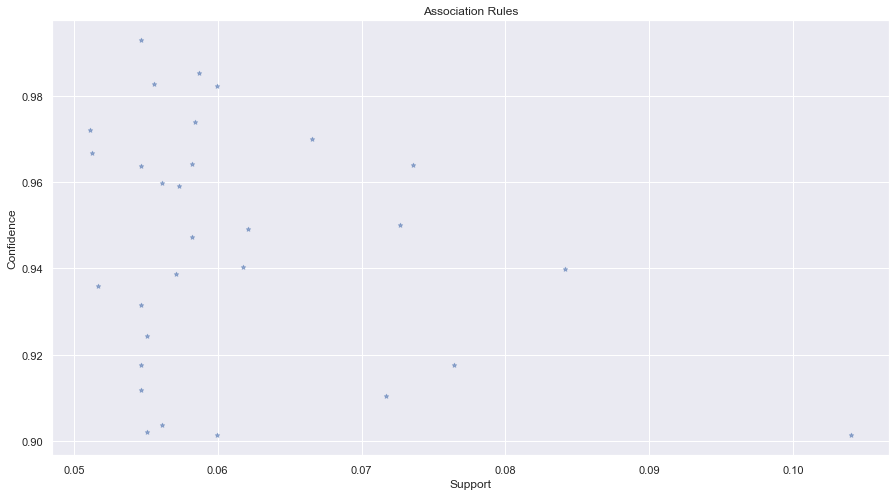

In [61]:
rules_value.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

# graph for support, Confidence, Rules

In [62]:
df_graph = pd.DataFrame(rules_support_05)

In [63]:
df_graph

,0
0,171
1,144
2,96
3,59
4,30


In [64]:
df_graph = df_graph.set_index([pd.Index(['0.5', '0.6', '0.7','0.8','0.9'])])

In [65]:
df_graph

,0
0.5,171
0.6,144
0.7,96
0.8,59
0.9,30


In [66]:
df_graph.columns = ['0.05']

In [67]:
df_graph['0.03'] = rules_support_03

In [68]:
df_graph['0.01'] = rules_support_01

In [69]:
df_graph

,0.05,0.03,0.01
0.5,171,2532,316312
0.6,144,1904,237163
0.7,96,1282,161616
0.8,59,773,94417
0.9,30,374,42440


Text(0, 0.5, 'No. of Association rules')

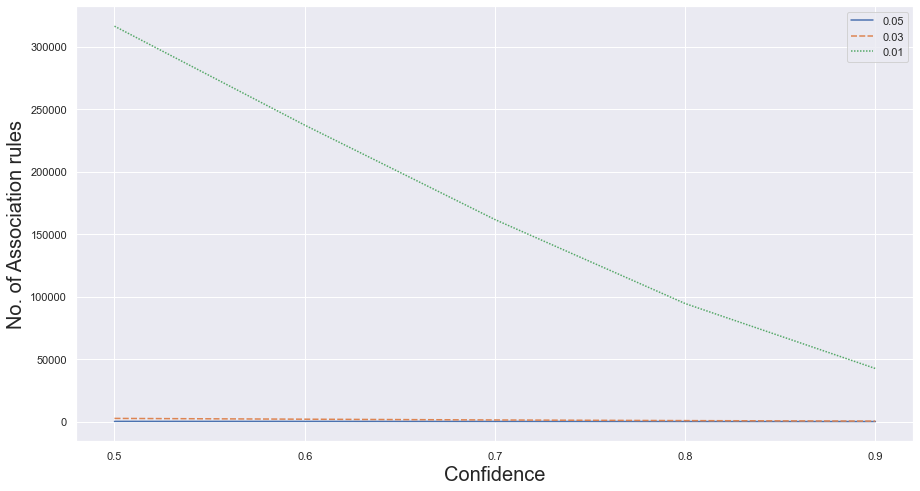

In [70]:
p = sns.lineplot(data=df_graph)
p.set_xlabel("Confidence", fontsize = 20)
p.set_ylabel("No. of Association rules", fontsize = 20)

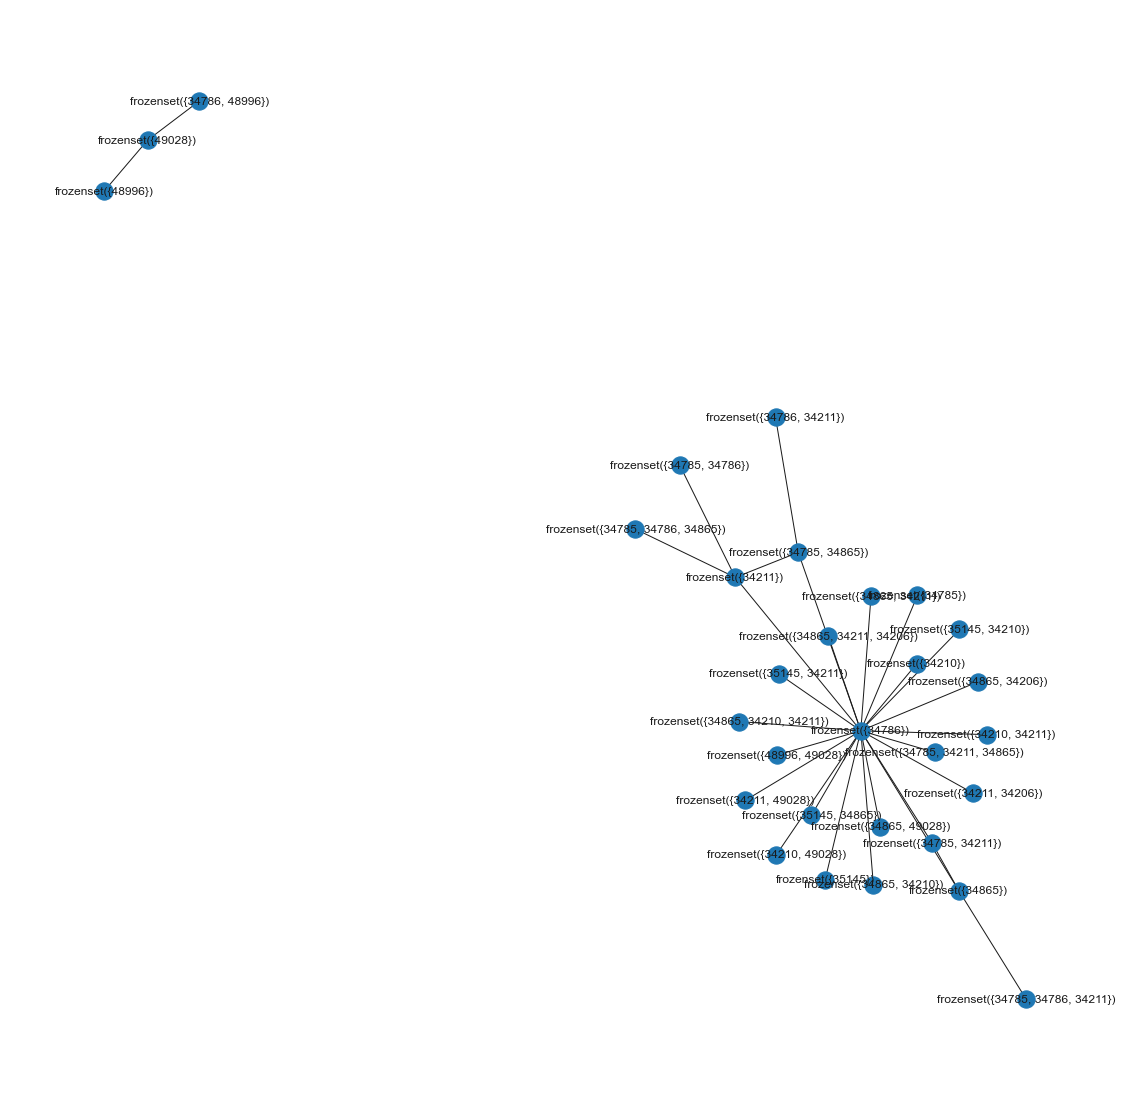

In [72]:
import networkx as nx
fig, ax=plt.subplots(figsize=(20,20))
GA=nx.from_pandas_edgelist(rules5,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [ ]:
import random
import matplotlib.pyplot as plt
 
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [ ]:
import inspect

In [ ]:
inspect(rules4[1:10])

In [ ]:
rules5 = mlxtend.frequent_patterns.association_rules(
    apriori_model_colnames_sup, 
    metric="lift",
    min_threshold=5, 
    support_only=False
)

In [ ]:
rules5

In [ ]:
rules4.plot.scatter("support", "confidence", alpha=0.5, marker=".")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

In [ ]:
len(client_item_list)

# Showing support, confidence, lift

In [ ]:
def frequency_items (x,y):
    fx_=sum([x in i for i in client_item_list])
    fy_=sum([y in i for i in client_item_list])
    
    fxy_=sum([all(z in i for z in [x,y]) for i in client_item_list])
    
    support=fxy_/len(client_item_list)
    confidence = support/(fx_/len(client_item_list))
    lift =confidence /(fy_/len(client_item_list))
    if confidence ==1:
        conviction = 0
    else:
        conviction=(1-(fy_/len(client_item_list)))/(1-confidence)
    
    print("Support = {}".format(round(support,2)))
    print("Confidence = {}".format(round(confidence,2)))
    print("Lift= {}".format(round(lift,2)))
    print("Conviction={}".format(round(conviction,2)))

In [ ]:
frequency_items('Barritas Pina 67g Prom MTB MLA 30575','Barritas Fresa 67g Prom MTB MLA 30572')

# Recommendations

In [ ]:
from apyori import apriori 
association_rules = apriori(client_item_list, min_support=0.01, min_confidence=0.9, min_lift=3, min_length=3)   

In [ ]:

print(len(association_results)) 

In [ ]:
for item in association_results:

        # first index of the inner list
        # Contains base item and add item
        pair = item[0] 
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(item[1]))

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")



In [ ]:
import networkx as nx
fig, ax=plt.subplots(figsize=(25,10))
GA=nx.from_pandas_edgelist(rules_new,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [ ]:
#There are not any association rules with both extremly high confidence and extremely high support.

#This make sense. If an item set has high support, the items are likely to appear with many other items, making the chances of high confidence very low.

In [ ]:
#Next we can do top statewise identification of product bundles and propose customers based on that

In [ ]:
#we can also test our suggestion on other dataset (Week 4's)

In [315]:
df_cleaned_state = df_cleaned.groupby(['state'], as_index=False)['sales_unit_this_week'].sum()

In [317]:
df_cleaned_state = df_cleaned_state.sort_values(by = 'sales_unit_this_week',ascending=False)

In [318]:
df_cleaned_state

,state,sales_unit_this_week
9,ESTADO DE MÉXICO,9162152
16,"MÉXICO, D.F.",8304930
13,JALISCO,5902133
18,NUEVO LEÓN,3577690
30,VERACRUZ,3424346
10,GUANAJUATO,3361671
20,PUEBLA,2980586
14,MICHOACÁN,2503292
28,TAMAULIPAS,2026575
1,BAJA CALIFORNIA NORTE,1956581


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


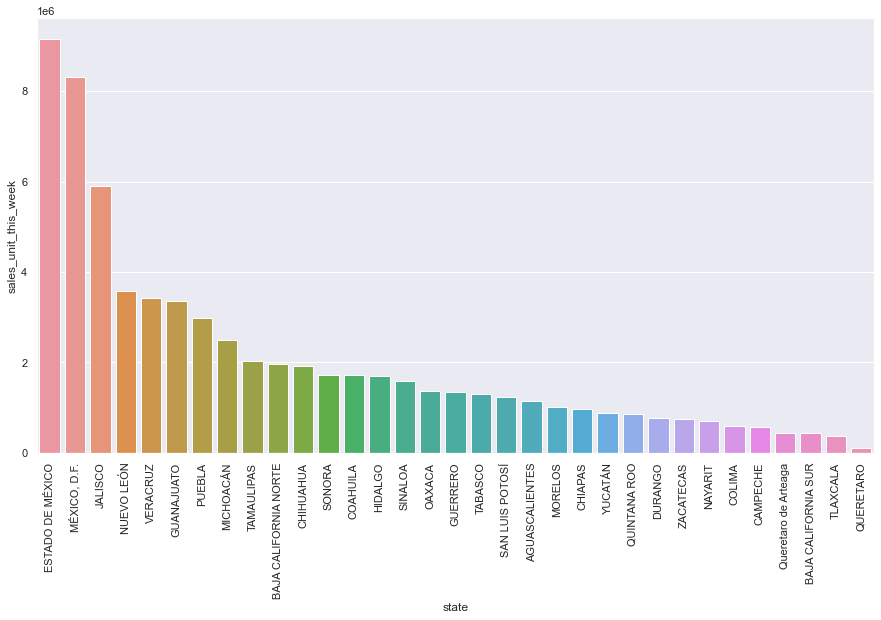

In [319]:
import seaborn as sns
sns.barplot(df_cleaned_state["state"], df_cleaned_state["sales_unit_this_week"])
plt.xticks(rotation=90)
plt.show()